# TF-IDF

TF-IDF je metóda hodnotenia relevancie pri vyhľadávaní textu. Vyjadruje dôležitosť slova v dokumente naprieč sadou dokumentov (korpusom).

**Definícia**
$$TFIDF_{i,j} = TF_{i,j} \times IDF_{i}$$

## TF - Term Frequency

TF zložka vyjadruje početnosť výrazu v ramci dokumentu. Väčšinou sa normalizuje, aby nedochádzalo k nadhodnocovaniu dlhých dokumentov.

**Definícia**
$$TF_{i,j} = \frac{n_{i,j}}{\sum ^{n}_{k} n_{k,j}}$$

kde:
 - $n_{i,k}$ je počet výskytov slova $t_{i}$ v dokumente $d_{j}$
 - $\sum ^{n}_{k} n_{k,j}$ reprezentuje súčet počtu výskytov všetkých slov v dokumente $d_{j}$, teda jeho dĺžku

## IDF - Inverse Document Frequency

IDF zložka reprezentuje dôležitosť slova v dokumente. Čím menej sa slovo v dokumente vyskytuje, tým viac je dôležité.

**Definícia**
$$IDF_{i} = \log\frac{|D|}{|\{j:t_{i}\in d_{j}\}|}$$

kde:
 - $|D|$ predstavuje veľkosť databázy prehľadávaných dokumentov (počet)
 - $|\{j:t_{i}\in d_{j}\}|$  predstavuje počet dokumentov, ktoré obsahujú slovo $i$

# Implementacia v Python

In [48]:
# Nainstalujeme si pripadne chybajuce zavislosti
%pip install pandas nltk scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


Na nacitanie vstupneho datasetu pouzijeme kniznicu *pandas*.


In [22]:
import pandas as pd

df = pd.read_csv('data/COVID-19_Vaccine.csv', usecols=[2, 3])
df['texts'] = df['ArticleTitle'] + ' ' + df['ArticleText']
df = df.drop(columns=["ArticleText"])

Nasledne si predspracujeme vstupne data

In [38]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/godric/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/godric/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/godric/nltk_data...


True

In [24]:
df['texts'] = df['texts'].str.strip()
df.head()

,ArticleTitle,texts
0,Perfect storm' of disease ahead with vaccines ...,Perfect storm' of disease ahead with vaccines ...
1,Pfizer requests FDA authorization for Covid-19...,Pfizer requests FDA authorization for Covid-19...
2,FDA approves remdesivir to treat young childre...,FDA approves remdesivir to treat young childre...
3,How well is our immunity holding up against Co...,How well is our immunity holding up against Co...
4,When will the US have a Covid-19 vaccine for t...,When will the US have a Covid-19 vaccine for t...


In [35]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = stopwords.words('english') + ['covid', 'covid', 'coronavirus', 'corona', '19']

tfidf = TfidfVectorizer(
    max_features=20,
    max_df=0.9,
    min_df=5,
    ngram_range=(2, 3),
    lowercase=True,
    stop_words=stop_words
)

vectors = tfidf.fit_transform(df['texts'].values.tolist())
feature_names = tfidf.get_feature_names_out()
dense = vectors.todense()
denselist = dense.tolist()

all_keywords = []

for description in denselist:
    x = 0
    keywords = []
    for word in description:
        if word > 0:
            keywords.append(feature_names[x])
        x = x + 1
    all_keywords.append(keywords)

df2 = pd.DataFrame(denselist, columns=feature_names)
df2


,advisory committee,age group,around world,booster dose,centers disease,centers disease control,clinical trials,control prevention,disease control,disease control prevention,emergency use,immune system,infectious diseases,johnson johnson,last week,pfizer biontech,pfizer vaccine,public health,two doses,two months
0,0.000000,0.000000,0.000000,0.000000,0.307395,0.307395,0.000000,0.295579,0.295579,0.295579,0.000000,0.000000,0.000000,0.000000,0.403233,0.000000,0.000000,0.000000,0.452501,0.426101
1,0.000000,0.458205,0.205961,0.486593,0.165277,0.165277,0.000000,0.158924,0.158924,0.158924,0.179471,0.000000,0.000000,0.000000,0.000000,0.317849,0.433613,0.000000,0.243297,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.212730,0.000000,0.000000,0.502584,0.170709,0.170709,0.000000,0.164147,0.164147,0.164147,0.000000,0.502584,0.000000,0.405418,0.000000,0.164147,0.000000,0.000000,0.251292,0.236631
4,0.204477,0.454903,0.102239,0.000000,0.164086,0.164086,0.120772,0.157779,0.157779,0.157779,0.267267,0.000000,0.215244,0.000000,0.000000,0.236669,0.215244,0.000000,0.603858,0.113726
5,0.355343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.154820,0.000000,0.187027,0.338605,0.000000,0.274191,0.000000,0.000000,0.000000,0.790537
6,0.494530,0.000000,0.000000,0.584176,0.198422,0.198422,0.000000,0.190795,0.190795,0.190795,0.215463,0.000000,0.000000,0.000000,0.000000,0.190795,0.260286,0.000000,0.000000,0.275047
7,0.000000,0.000000,0.000000,0.000000,0.262101,0.262101,0.000000,0.252026,0.252026,0.252026,0.284610,0.000000,0.000000,0.000000,0.343817,0.000000,0.687635,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.367132,0.367132,0.000000,0.353021,0.353021,0.353021,0.000000,0.000000,0.481595,0.000000,0.000000,0.353021,0.000000,0.000000,0.000000,0.000000
9,0.191146,0.000000,0.000000,0.000000,0.153388,0.153388,0.000000,0.147492,0.147492,0.147492,0.000000,0.000000,0.000000,0.910709,0.000000,0.147492,0.000000,0.000000,0.000000,0.000000


In [33]:
print(df.texts[0])
print(all_keywords[0])

#df2.iloc[2].nlargest(10)

Perfect storm' of disease ahead with vaccines delayed and measles cases up, WHO and UNICEF say The World Health Organization and the United Nations International Children's Emergency Fund warned of an increased risk of measles spread, with worldwide cases up nearly 80% so far in 2022 compared with 2021. Almost 17,338 measles cases were reported worldwide in January and February 2022, compared to 9,665 during the first two months of 2021, the organizations said in a news release on Wednesday, noting there were 21 "large and disruptive" outbreaks, many in Africa and the East Mediterranean region. "Pandemic-related disruptions, increasing inequalities in access to vaccines, and the diversion of resources from routine immunization are leaving too many children without protection against measles and other vaccine-preventable diseases," the organizations said, adding that as cities and countries relax Covid-19 pandemic restrictions, measles outbreaks become more likely.
"It is encouraging th

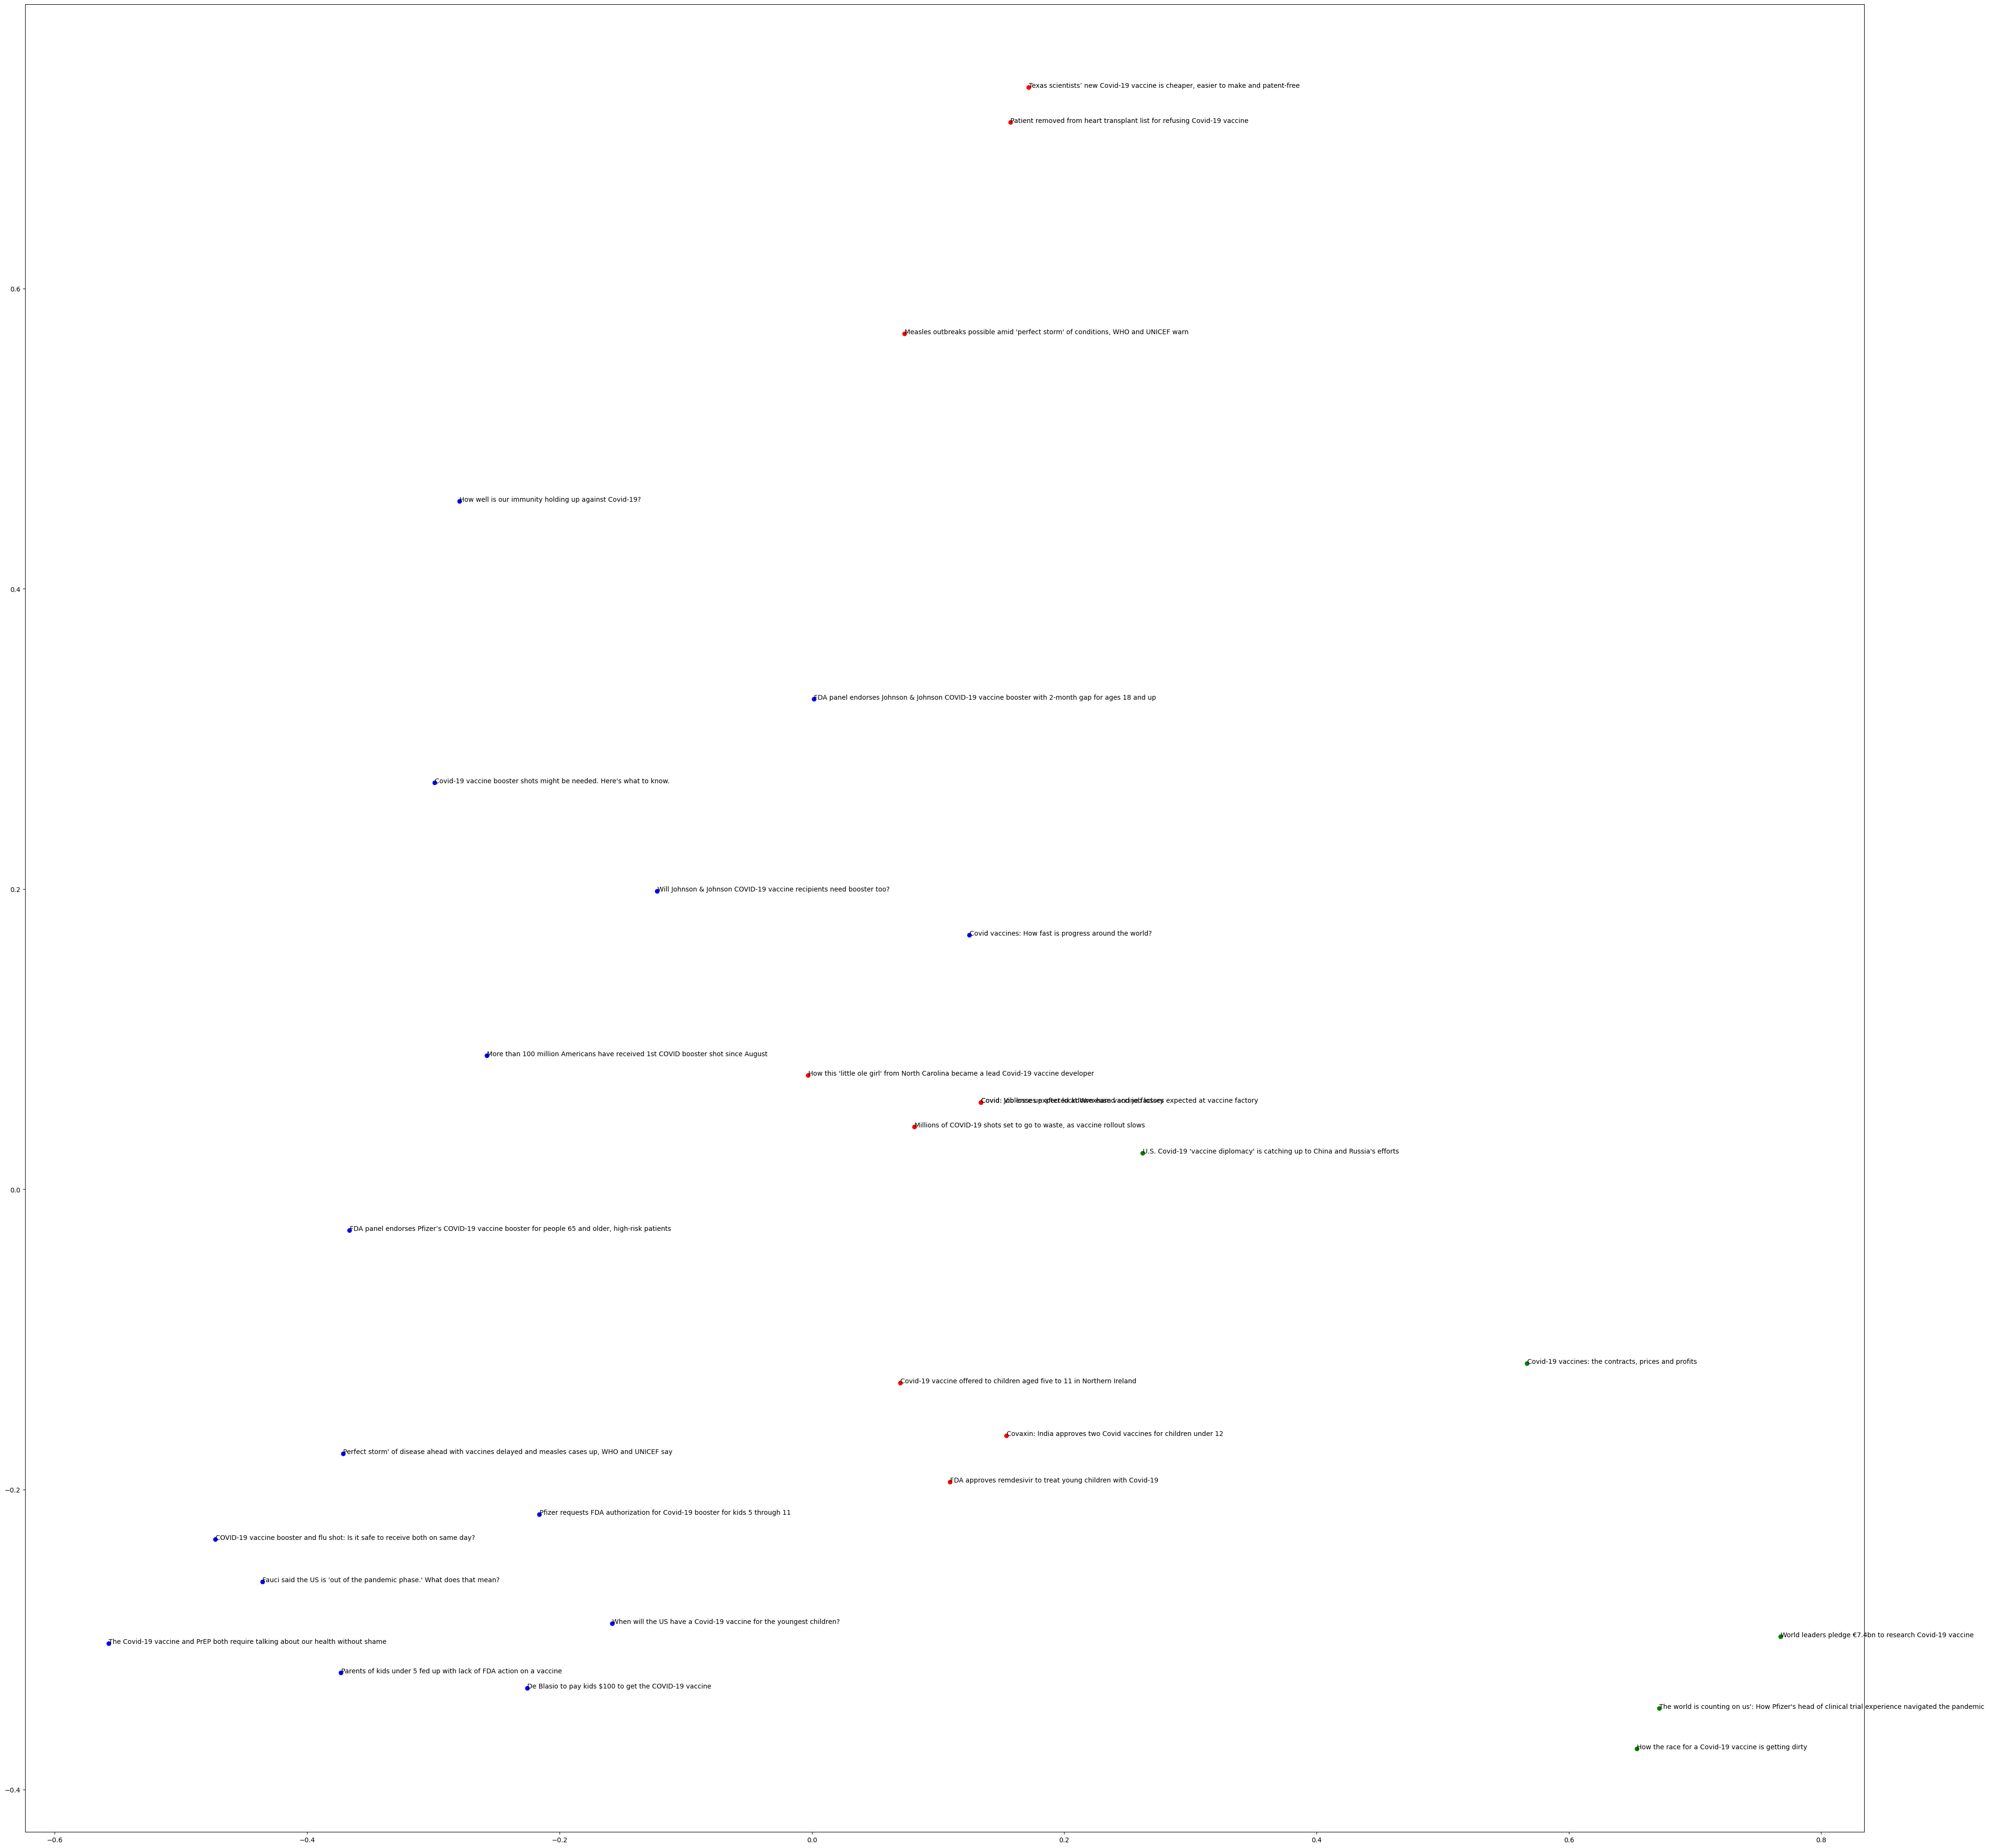

In [36]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

true_k = 3

model = KMeans(n_clusters=true_k, init="k-means++", max_iter=100, n_init=1)
model.fit(vectors)

order_centroinds = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names_out()

with open("data/trc_results.txt", "w", encoding="utf-8") as f:
    for i in range(true_k):
        f.write(f"Cluster {i}")
        f.write("\n")
        for ind in order_centroinds[i, :20]:
            f.write(' %s' % terms[ind],)
            f.write("\n")
        f.write("\n")
        f.write("\n")

kmean_indicies = model.fit_predict(vectors)

pca = PCA(n_components=2)

scatter_plot_points = pca.fit_transform(vectors.toarray())

colors = ["b", "g", "r"]

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

fig, ax = plt.subplots(figsize=(50,50))

ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indicies])

for i, txt in enumerate(df['ArticleTitle'].values.tolist()):
    ax.annotate(txt, (x_axis[i], y_axis[i]))

plt.savefig("data/trc_figure.png")